# PCA Beispiel für Gauss Noise

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Hilfsfunktion

In [2]:
def show_data (data, image_name = None, eig_vec = None, eig_val = None):
    plt.grid(color='gray', linestyle='-', linewidth=1)
    if (data.shape[1] == 1):
        plt.plot(data, np.zeros(len(data)), "o", markersize=3)
        frame = plt.gca()
        frame.axes.get_yaxis().set_visible(False)
    else:
        plt.plot(data.T[0], data.T[1], "o", markersize=3)
        plt.axis('equal')
    if eig_vec is not None and eig_vec is not None:
        origin = np.mean(data, axis = 0)
        x1 = eig_val[0] * eig_vec.T[0]
        x2 = eig_val[1] * eig_vec.T[1]
        plt.plot([origin[0], x1[0]], [origin[1], x1[1]], color="red", linewidth=3.5)
        plt.plot([origin[0], x2[0]], [origin[1], x2[1]], color="red", linewidth=3.5)
    if image_name is not None:
        plt.savefig(image_name + '.pdf')
    plt.show()

### Erstellen des Datensatzes

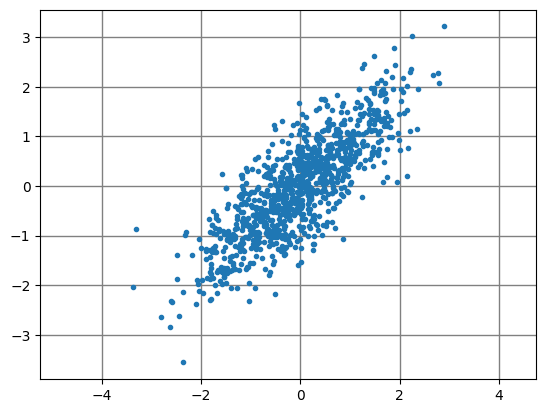

In [3]:
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
np.random.seed(seed=1111)
data = np.random.multivariate_normal(mean, cov, 1000)

show_data(data)

### PCA Schritt für Schritt

In [4]:
#Berechnung der Kovarianz-Matrix der Daten
cov_matrix = np.cov(data.T)
print("Kovarianzmatrix:\n", cov_matrix)

Kovarianzmatrix:
 [[1.00083212 0.79439155]
 [0.79439155 0.97428652]]


Eigenwerte:
 [0.19305689 1.78206175] 

Eigenvektoren:
 [[ 0.70117551 -0.71298871]
 [-0.71298871 -0.70117551]] 

Eingezeichnete Eigenvektoren (skaliert mit Eigenwerten):


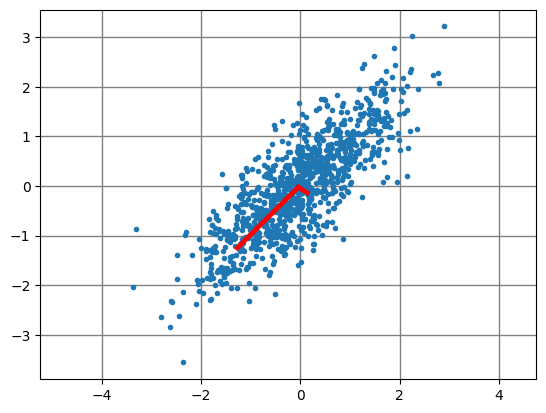

In [11]:
#Eigenwert Zerlegung
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
print("Eigenwerte:\n", eigen_values, "\n\nEigenvektoren:\n", eigen_vectors,
       "\n\nEingezeichnete Eigenvektoren (skaliert mit Eigenwerten):")
show_data (data, eig_vec = eigen_vectors, eig_val = eigen_values)

In [12]:
#Sortierung der Eigenwerte und -vektoren
order = np.flip(eigen_values.argsort())
eigen_vectors = eigen_vectors[:,order]

#Auswahl der d größten Eigenwerte
d = 2
Q = eigen_vectors[:,:d]
print("Transformationsmatrix Q:\n", Q)

Transformationsmatrix Q:
 [[-0.71298871  0.70117551]
 [-0.70117551 -0.71298871]]


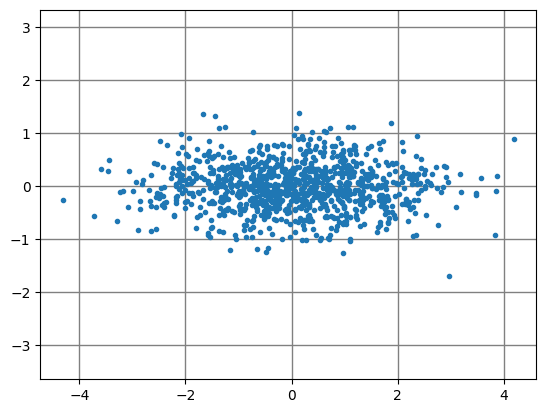

In [13]:
#Berechnung der transformierten Daten
pca_data = data @ Q
show_data(pca_data)

### PCA zusammengesetzt

In [8]:
def pca (data, d):
    #Berechnung der Kovarianz-Matrix der Daten
    cov = np.cov(data.T)

    #Eigenwert Zerlegung
    eigen_values, eigen_vectors = np.linalg.eigh(cov)

    #Sortierung der Eigenwerte und -vektoren
    order = np.flip(eigen_values.argsort())
    eigen_vectors = eigen_vectors[:,order]

    #Auswahl der d größten Eigenwerte
    Q = eigen_vectors[:,:d]
    
    #Ausgabe der transformierten Daten
    return data @ Q

### PCA auf 2 Dimensionen

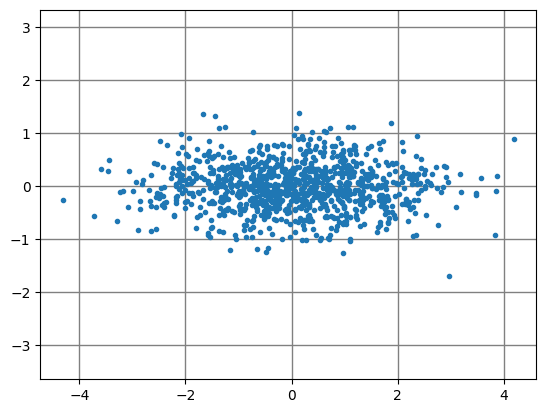

In [9]:
pca_data = pca(data, 2)
show_data(pca_data)

### PCA auf 1 Dimension

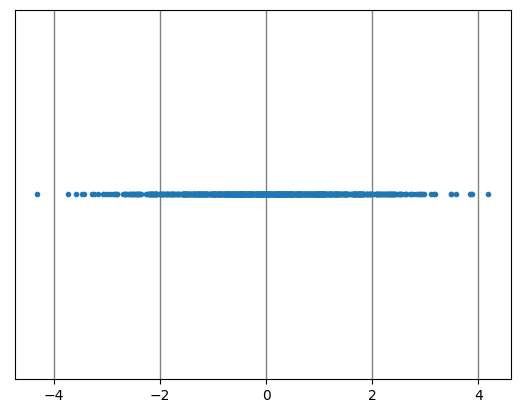

In [10]:
pca_data = pca(data, 1)
show_data(pca_data)